# 1. Import Library

In [19]:
import pandas as pd
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
X=raw_df.drop(columns = ['Class'])
y=raw_df['Class']
print('X:', X.shape)
print('Y:', y.shape)

X: (284807, 30)
Y: (284807,)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (199364, 30)
X_test: (85443, 30)


# 2. Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# 3. Create Model 

In [41]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [42]:
model = Sequential()

In [43]:
model.add(Dense(units=40, input_dim=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [44]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [45]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 40)                1240      
                                                                 
 dense_10 (Dense)            (None, 30)                1230      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2,501
Trainable params: 2,501
Non-trainable params: 0
_________________________________________________________________


# 4. Train model

In [47]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [49]:
train_history =model.fit(x=X_train, 
                         y=y_train, 
                         validation_split=0.2, 
                         epochs=10,
                         batch_size=30,verbose=2)

Epoch 1/10
5317/5317 - 14s - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9993 - 14s/epoch - 3ms/step
Epoch 2/10
5317/5317 - 9s - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9993 - 9s/epoch - 2ms/step
Epoch 3/10
5317/5317 - 16s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9993 - 16s/epoch - 3ms/step
Epoch 4/10
5317/5317 - 10s - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0034 - val_accuracy: 0.9994 - 10s/epoch - 2ms/step
Epoch 5/10
5317/5317 - 13s - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9993 - 13s/epoch - 2ms/step
Epoch 6/10
5317/5317 - 9s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0033 - val_accuracy: 0.9993 - 9s/epoch - 2ms/step
Epoch 7/10
5317/5317 - 10s - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0033 - val_accuracy: 0.9993 - 10s/epoch - 2ms/step
Epoch 8/10
5317/5317 - 10s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0031 - val_accuracy: 0.9994 - 10s/epoch - 2ms/s

# 5. Print Training History

In [50]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

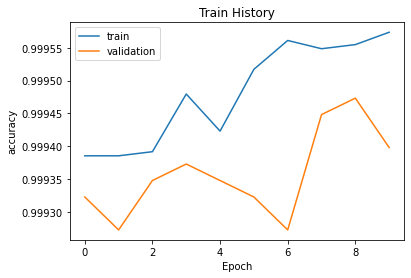

In [51]:
show_train_history(train_history,'accuracy','val_accuracy')

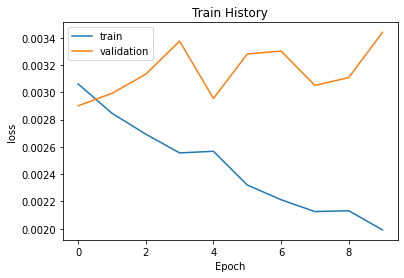

In [52]:
show_train_history(train_history,'loss','val_loss')

# 6. Evaluate

In [53]:
scores = model.evaluate(x=X_test, 
                        y=y_test)

2671/2671 [==============================] - 8s 3ms/step - loss: 0.0030 - accuracy: 0.9993


In [54]:
scores[1]

0.9993445873260498